In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import re


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df = pd.read_csv('C:\Data Science\Time series analysis/clead_earth_quake_data.csv',names=["index","datetime","nearest_volcano_distance","location","latitude","longitude","magnitude","depth"],header=None)

In [4]:
df.head()

,index,datetime,nearest_volcano_distance,location,latitude,longitude,magnitude,depth
0,NaN,Date and time,Nearest volcano (distance),Location,Latitude,Longitude,Magnitude,Depth
1,0.0,29 Dec 2010 2:03 pm (GMT +0) (29 Dec 2010 14:0...,(0 km),"West Jaintia Hills, 56 km east of Shillong, Ea...",25.575272,91.888212,4.1,4.130 km
2,1.0,12 Dec 2010 01:40:06 GMT,(0 km),"Manipur, India region",24.649936,93.810293,4.8,4.847 km
3,2.0,11 Sep 2010 07:02:09 GMT,(0 km),"Meghalaya, India region",25.500167,91.457209,4.5,4.522 km
4,3.0,10 Sep 2010 17:24:16 GMT,(0 km),Bangladesh,24.045958,90.032723,5.1,5.110 km


In [5]:
df.shape

(311, 8)

In [6]:
df=df.drop(0,axis=0)
df = df.set_index('index')
df.index = df.index.astype(int)

In [7]:
def DateTimePreprocessing(s):
    
    matched = re.search(r"\(\d\d.*?\)",s)
    if matched is not None:
        date = re.search(r'\((.*?)\)',matched.group(0)).group(1)
        return datetime.strptime(date.replace(' ','-'),"%d-%b-%Y-%H:%M:%S-GMT")
    else:
        date = re.search(r'\((\d.*?)\)',s)
        if date is not None:
            
            return datetime.strptime(date.group(0).replace(' ','-'),"(%d-%b-%Y-%H:%M:%S-GMT)")
        else:
            return datetime.strptime(s.replace(' ','-'),"%d-%b-%Y-%H:%M:%S-GMT")

In [8]:
df.datetime=df.datetime.apply(lambda s: pd.to_datetime(DateTimePreprocessing(s)))

In [9]:
df.depth=df.depth.apply(lambda s: re.search("\d+\.\d+", s).group(0)).astype('float32')

In [10]:
df.latitude = df.latitude.astype('float32')
df.longitude = df.longitude.astype('float32')
df.magnitude = df.magnitude.astype('float32')



df.nearest_volcano_distance=df.nearest_volcano_distance.apply(lambda s: re.search(r'\((.*?)\)',s).group(1))

In [11]:
df.nearest_volcano_distance=df.nearest_volcano_distance.apply(lambda s: re.search("\d+", s).group(0)).astype('int')

In [12]:
df.nearest_volcano_distance

index
0        0
1        0
2        0
3        0
4        0
      ... 
305    222
306    353
307    564
308    607
309    516
Name: nearest_volcano_distance, Length: 310, dtype: int32

In [13]:
df.dtypes

datetime                    datetime64[ns]
nearest_volcano_distance             int32
location                            object
latitude                           float32
longitude                          float32
magnitude                          float32
depth                              float32
dtype: object

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='magnitude', ylabel='datetime'>

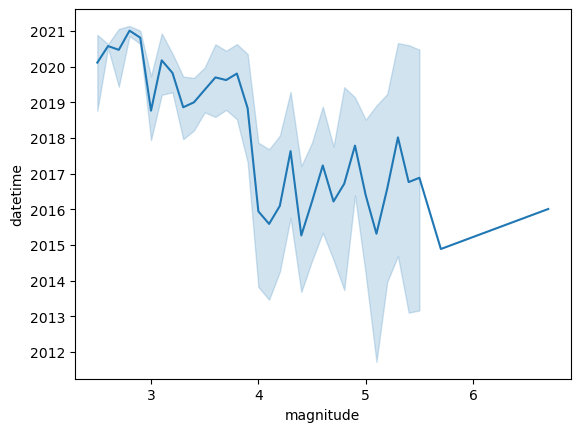

In [15]:
sns.lineplot(data=df,y="datetime",x="magnitude")

<AxesSubplot:xlabel='datetime'>

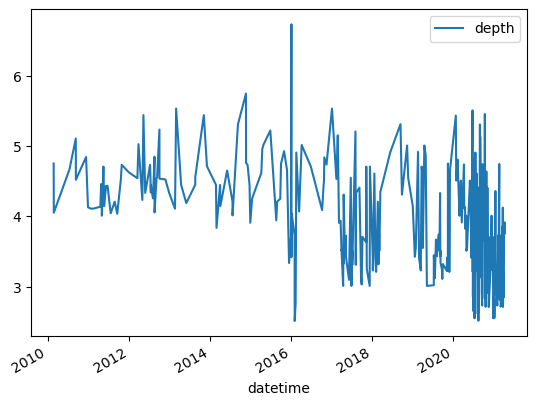

In [16]:
df.plot(x="datetime",y="depth")

<AxesSubplot:>

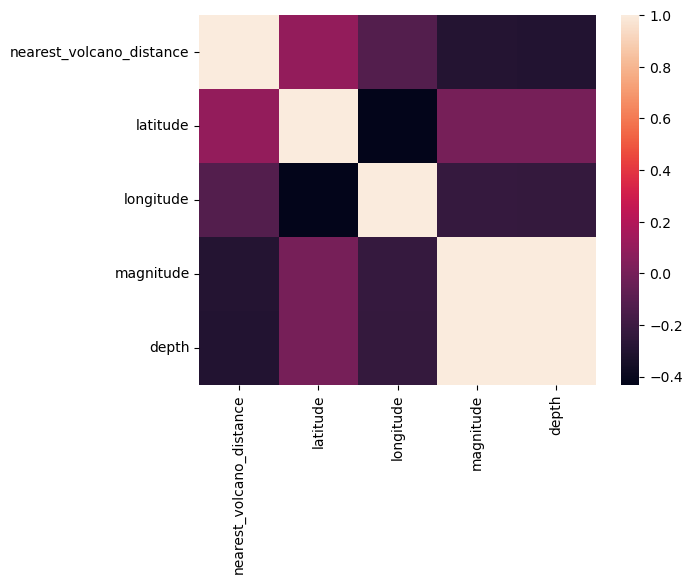

In [17]:
sns.heatmap(df.corr())

In [22]:
!conda install -c conda-forge fbprophet -y


Examining @/win-64::__win==0=0:  80%|########  | 4/5 [00:08<00:02,  2.48s/it]          
                                                                             

Examining conflict for fbprophet python:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - fbprophet -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.






Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


In [24]:
!pip install --upgrade plotly

<AxesSubplot:xlabel='datetime'>

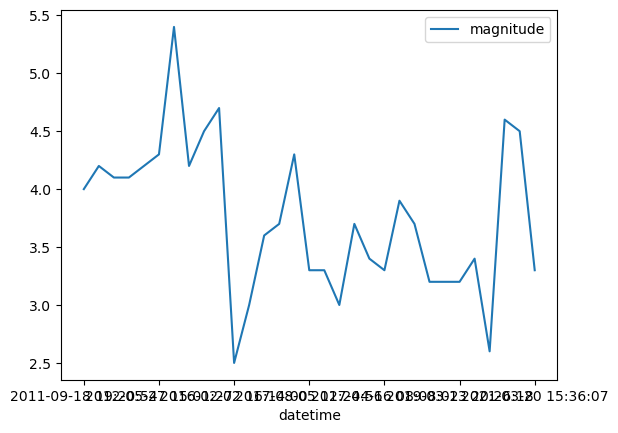

In [26]:
p = df[df.location.duplicated()]
p.plot(x="datetime",y="magnitude")

In [ ]:
sns.countplot(data=p,x="magnitude")

In [ ]:
data=df
data.datetime = data.datetime.astype('string')

In [ ]:
import plotly.express as px

px.scatter_geo(data,lat='latitude',lon='longitude',
               scope="asia",animation_frame="datetime",
               hover_name="location",color='depth',size='magnitude')


In [ ]:
from fbprophet import Prophet

In [ ]:
data = df[['datetime','magnitude']]
data.columns = ['ds','y']

In [ ]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


In [ ]:

solution = m.plot(forecast)


In [ ]:
solution1 = m.plot_components(forecast)
